![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Basic Data Cleaning and EDA

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in the `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is and _claim amounts_. You will help the senior management with some business questions that should help them to better understand their customers, improve their services and improve profitability.

**Some business Objectives for the case study could be**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df` (i.e. `customer_df = pd.readcsv("")`)
3. First, look at its main features (`head`, `shape`, `info`).
4. Rename the columns so they follow the PE8 (snake case).
5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. **Hint**: One thing you can try is to change date column to datetime format.
6. Plot a correlation matrix, and comment on what you observe.
7. Plot every continuous variable. Comment what you can see in the plots.
8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. 
You should also delete the column `customer_id` before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column `customer_id` required. **Hint**: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.
9. Look for outliers in the continuous variables. (**Hint**: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.
10. Check all columns for *NaN* values. Decide what (if anything) you will need to do with them.



### 1. Import Libraries

In [1]:


from sqlalchemy import create_engine
import pandas as pd
from getpass import getpass  # To get the password without showing the input

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 2. Read Dataset

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. Main features

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename so they follow PE8

In [6]:

cols = [col_name.lower().replace(' ', '_') for col_name in customer_df]
customer_df.columns = cols
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 5. Fixing data

In [8]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"], errors='coerce')
customer_df["effective_to_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: effective_to_date
Non-Null Count  Dtype         
--------------  -----         
9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


### 6. Correlations Matrix

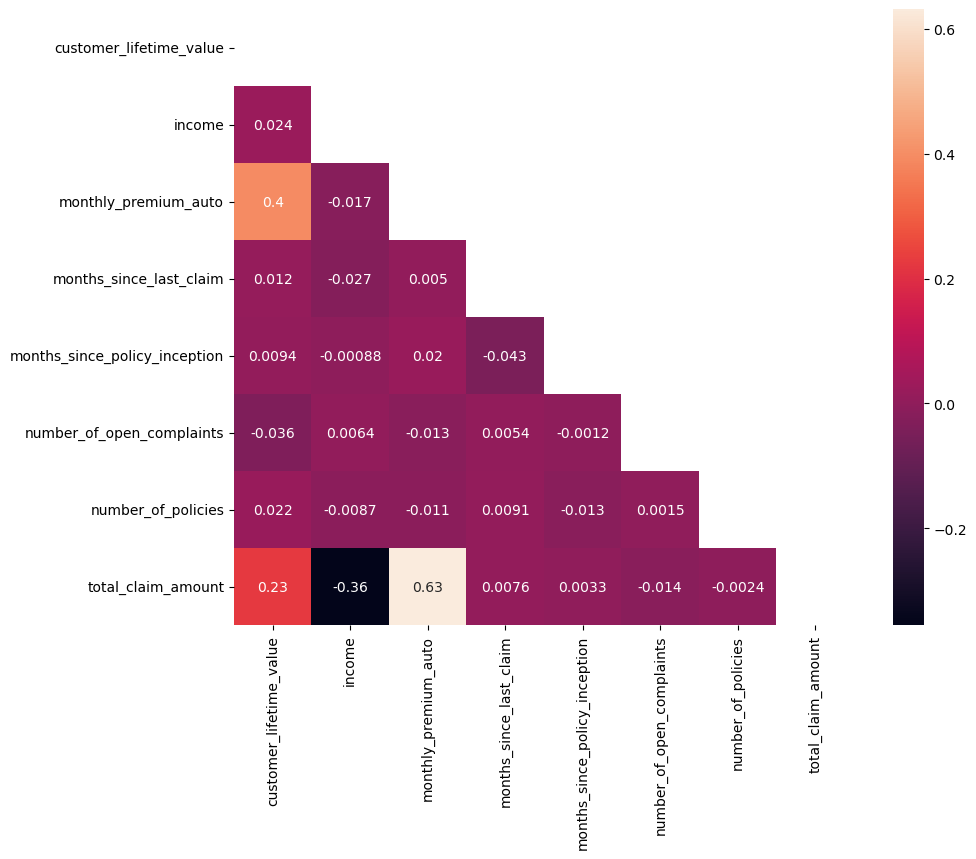

In [9]:
mask = np.zeros_like(customer_df.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(customer_df.corr(), mask=mask, annot=True)
plt.show()

### 7. Plotting continuous variables

In [10]:
numerical = customer_df.select_dtypes(include = np.number)
categorical = customer_df.select_dtypes(include = np.object)
categorical = categorical.drop(['customer'], axis=1)

/var/folders/7j/r8zftyvx5y5_sj_673jy39bw0000gn/T/ipykernel_63377/3983310345.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = customer_df.select_dtypes(include = np.object)


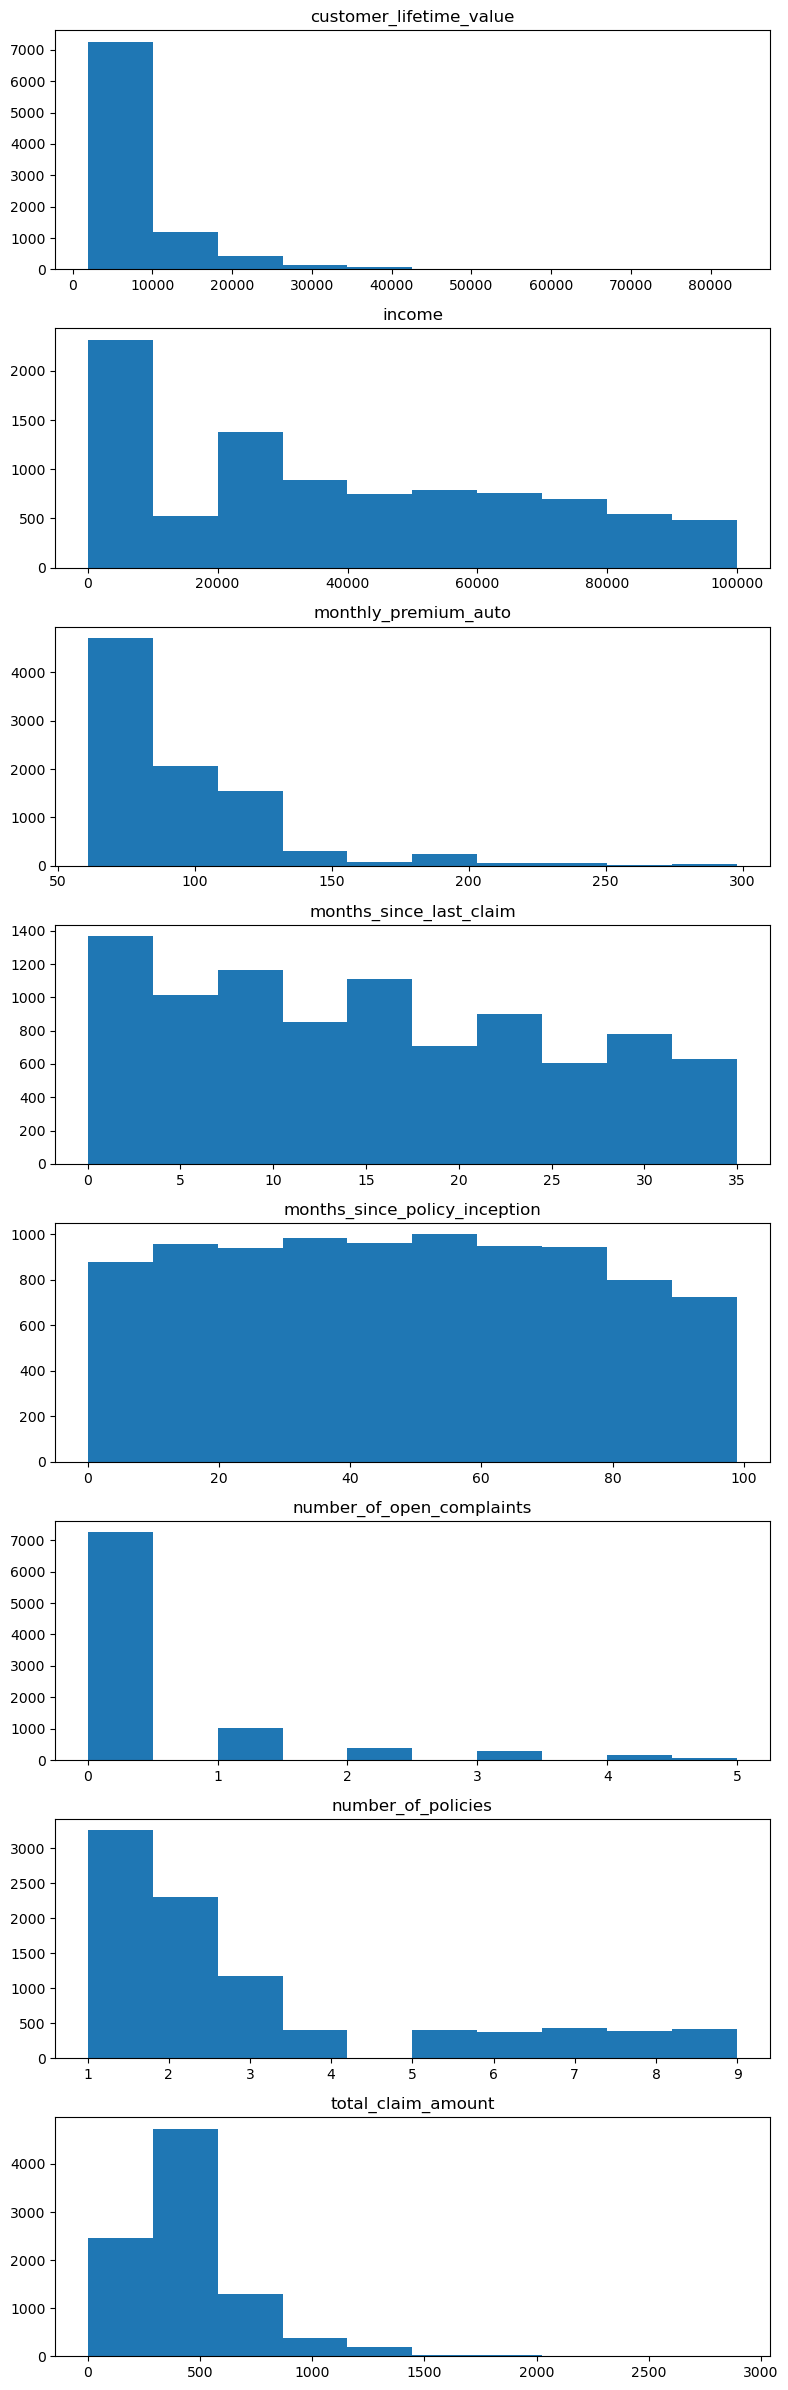

In [11]:
#Selecting continuos columns
continuous_cols = customer_df.select_dtypes(include=['float64', 'int64'], exclude=['bool']).columns
n_rows = len(continuous_cols)
n_cols = 1
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 8, n_rows * 3))

for i, col in enumerate(continuous_cols):
    ax = axes[i]
    ax.hist(customer_df[col], bins=10)
    ax.set_title(col)

plt.tight_layout()
plt.show()

### 8. Same for categoricals

In [34]:
import plotly.express as px

for col in categorical:
    fig = px.bar(customer_df[col].value_counts(), x=customer_df[col].value_counts().index, y=customer_df[col].value_counts().values)
    
    fig.update_layout(title=f'{col} counts')
    fig.show()

### 9. Looking for Outliers

<AxesSubplot:xlabel='total_claim_amount', ylabel='vehicle_size'>

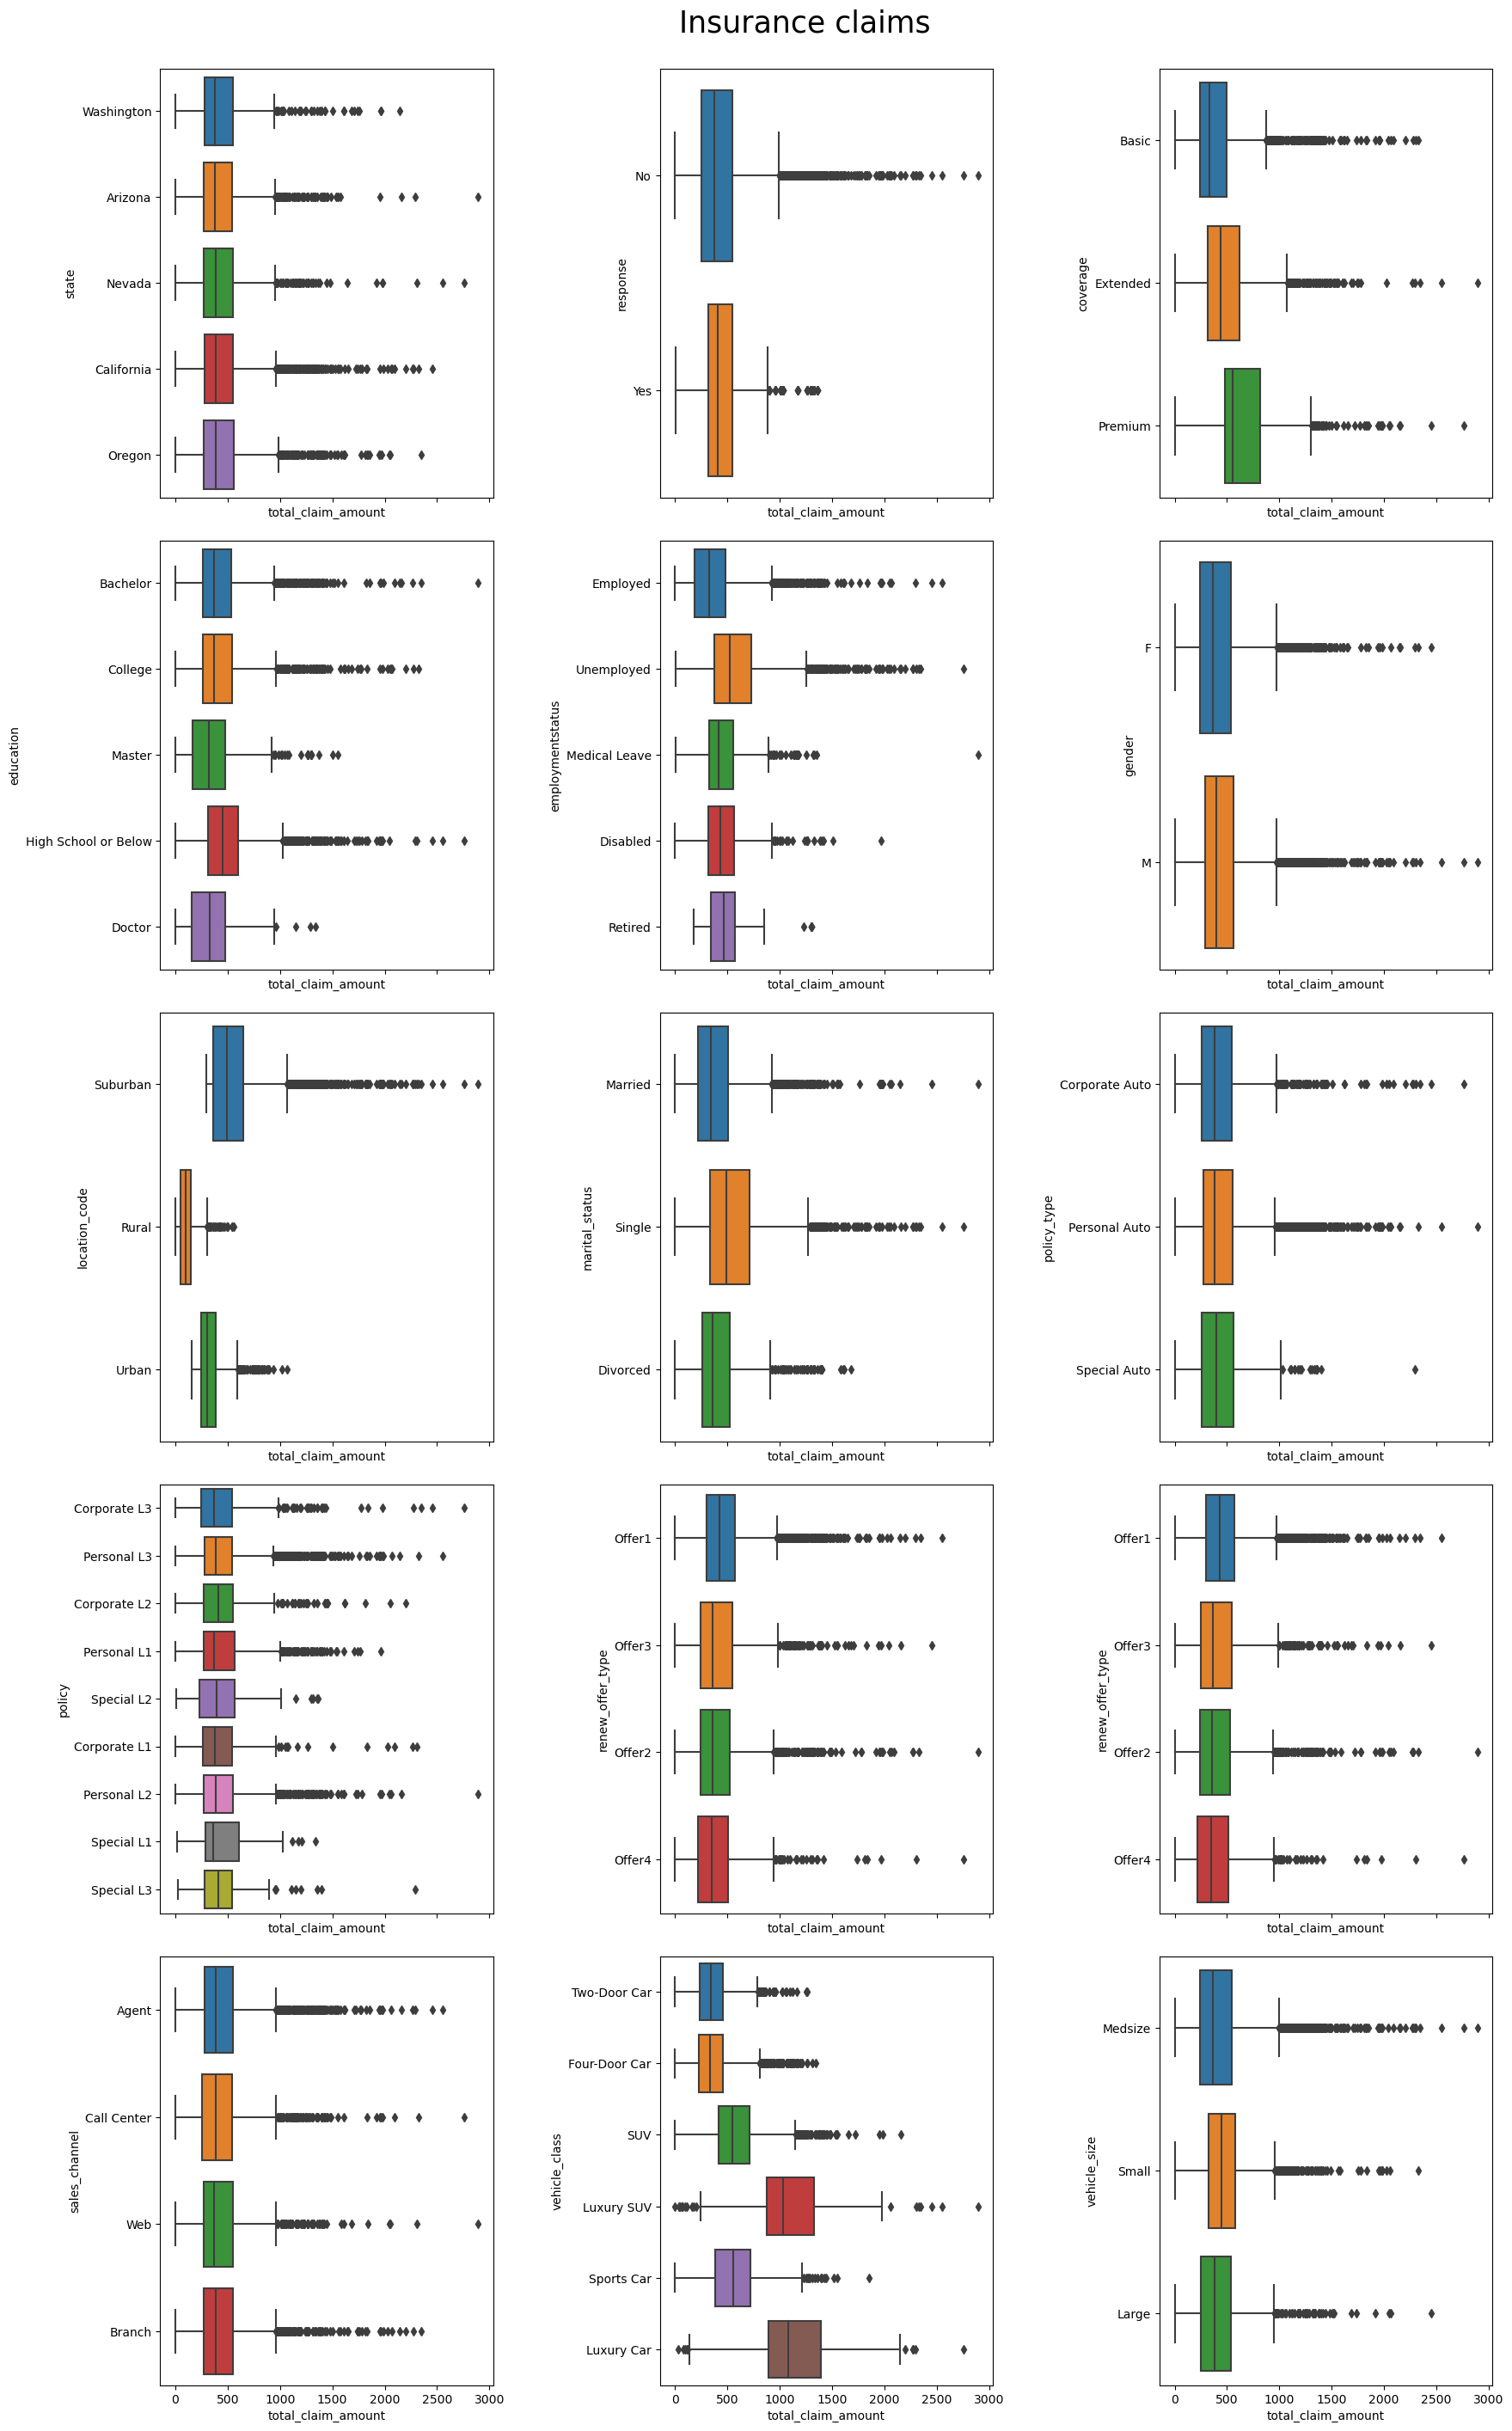

In [29]:
fig, axes = plt.subplots(5, 3, sharex=True, figsize=(20,35)) # 5 rows  x 3 columns

fig.subplots_adjust(hspace=0.1, wspace=.5) # ensure that the plots do not overlap

fig.suptitle('Insurance claims', x=0.5,y=0.9, fontsize =25)

sns.boxplot(ax=axes[0, 0], data=customer_df, x="total_claim_amount", y="state")
sns.boxplot(ax=axes[0, 1], data=customer_df, x="total_claim_amount", y="response")
sns.boxplot(ax=axes[0, 2], data=customer_df, x="total_claim_amount", y="coverage")
sns.boxplot(ax=axes[1, 0], data=customer_df, x="total_claim_amount", y="education")
sns.boxplot(ax=axes[1, 1], data=customer_df, x="total_claim_amount", y="employmentstatus")
sns.boxplot(ax=axes[1, 2], data=customer_df, x="total_claim_amount", y="gender")
sns.boxplot(ax=axes[2, 0], data=customer_df, x="total_claim_amount", y="location_code")
sns.boxplot(ax=axes[2, 1], data=customer_df, x="total_claim_amount", y="marital_status")
sns.boxplot(ax=axes[2, 2], data=customer_df, x="total_claim_amount", y="policy_type")
sns.boxplot(ax=axes[3, 0], data=customer_df, x="total_claim_amount", y="policy")
sns.boxplot(ax=axes[3, 1], data=customer_df, x="total_claim_amount", y="renew_offer_type")
sns.boxplot(ax=axes[3, 2], data=customer_df, x="total_claim_amount", y="renew_offer_type")
sns.boxplot(ax=axes[4, 0], data=customer_df, x="total_claim_amount", y="sales_channel")
sns.boxplot(ax=axes[4, 1], data=customer_df, x="total_claim_amount", y="vehicle_class")
sns.boxplot(ax=axes[4, 2], data=customer_df, x="total_claim_amount", y="vehicle_size")

#Source: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

### 10. Check NaN

In [14]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64